In [5]:
##- standard imports -##
import math
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

##- Additional Imports -##
import collections
from sklearn.cluster import KMeans
from collections import Counter
%matplotlib inline

path_to_ims = "./images/"

# Computer Vision
---

### Introduction

To introduce some of the more important computer vision concepts let's start with some baseline stuff and then move onto the harder algorithms later on. For the initial operations we'll use OpenCV2.

One important thing to note is the default colour formatting for opencv2 is BGR not RGB

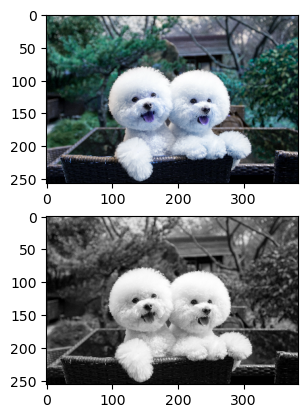

In [14]:
# loading images from memory
im1 = cv.imread(f"{path_to_ims}/image1.jpg")

# resizing to expected dims
im1 = cv.resize(im1, (384, 256))

# convert the image to grayscale and plot
gim1 = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
im2 = np.zeros_like(im1)
im2[:,:,0] = gim1 # To display the image correctly you'll need to send the grey channel to each of the three image channels
im2[:,:,1] = gim1
im2[:,:,2] = gim1

fig, ax = plt.subplots(2)
ax[0].imshow(im1)
ax[1].imshow(im2)

### Image transform operations

The first transform we'll look at is histogram normalization. This transform takes an image and equalizes each of the colour channels without destroying the data in the image. To start we'll need to split the image into each of it's three channels. Next we define a histogram plotting function print_graphs() which will print the histograms for each colour channel.

In [15]:
# splitting into individual channel objects
blue = im1[:,:,0]
green = im1[:,:,1]
red = im1[:,:,2]

assert blue.shape == green.shape == red.shape

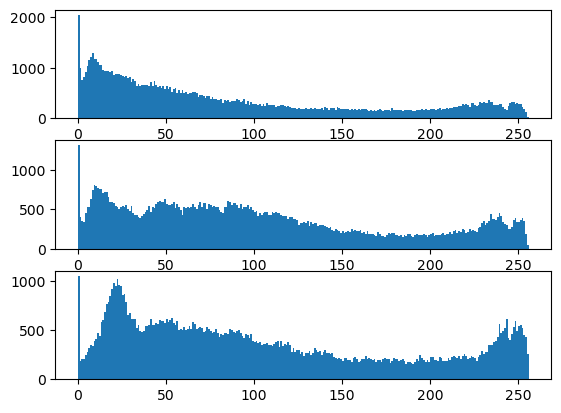

In [16]:
# Define print_graphs and run
def print_graphs(images, bins=256):
    ### - TODO: Add x, y labels, and graph label for each plot - ###
    fig1, ax1 = plt.subplots(len(images))
    for i, x in enumerate(images):
        ax1[i].hist(x.ravel(),bins,[0,bins])

print_graphs([blue, green, red])

### Histogram equalization

Equalize hists takes the original image and the channel splits and uses the inbuilt cv equalizeHist functions to normalize the colour in the image (remove camera added noise)

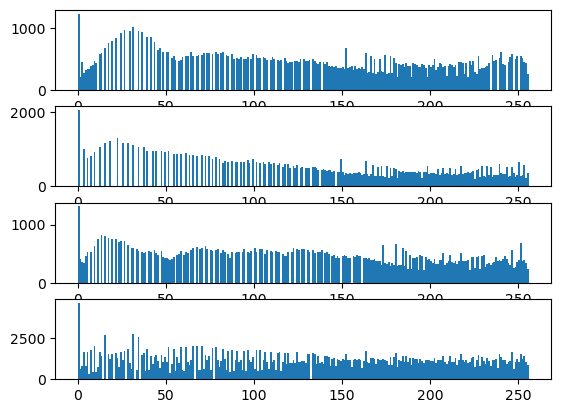

In [19]:
def equalize_hists(red, blue, green, img1): #Apply the opencv equalize histogram function to image 1
    #Equalize all three channels
    equR = cv.equalizeHist(red)
    equB = cv.equalizeHist(blue)
    equG = cv.equalizeHist(green)
    
    # Split and merge resized image #
    R,G,B = cv.split(img1)
    output1_R = cv.equalizeHist(R)
    output1_G = cv.equalizeHist(G)
    output1_B = cv.equalizeHist(B)

    equI = cv.merge((output1_R, output1_G, output1_B))
    
    #Graph new histograms#
    print_graphs([equR, equB, equG, equI])
    
    res = np.hstack((equR, equB, equG, red, blue, green)) #stacking images side-by-side

    return res
    
returned_image = equalize_hists(red, blue, green, im1)#Call back